# Visualizing data distributions

::::{grid}

:::{grid-item-card}
**Lecture learning goals**
^^^

By the end of the lecture you will be able to:

1. Visualize distributions.
2. Understand how different distribution plots are made and their pros and cons.
3. Select an appropriate distribution plot for the situation.
4. Create density plots to compare a few distributions.
5. Create boxplots and violin plot to compare many distributions.
:::

:::{grid-item-card}
**Required activities**
^^^

Before class: 
- Watch [this 30 min video on how distribution plots are created](https://ubcca-my.sharepoint.com/:v:/g/personal/joel_ostblom_ubc_ca/EXwcQii5i9lOgtST81EdRuoBF_Oq3j7zRxCgEybba5BENQ?e=e2fZNu) (CWL login required, the screen is intentionally blank for the first minute).

After class:

- Review the lecture notes.
- Chapter 7 and 9 of [Fundamentals of Data Visualization](https://clauswilke.com/dataviz/histograms-density-plots.html). 

:::
::::

**Lecture slides**

<html>
  <body>
    <iframe src="slides-lec3.pdf#zoom=80&&navpanes=0&statusbar=0&messages=0&pagemode=none" width="100%" height="475px" style="position: relative;z-index: 9999999;">
    </iframe>
  </body>
</html>

## Visualizing distributions

### Altair

We will use a movie data set similar to what we will be using in lab 2 this week.
It is collected from IMDB,
and includes both user ratings as well as movie budgets, runtimes, etc.

In [1]:
import pandas as pd

movies = pd.read_json('https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/movies.json')

movies

,id,title,runtime,budget,revenue,genres,countries,vote_average,vote_loved_it,vote_count,vote_std
0,12,Finding Nemo,100,94000000,940335536,[Animation],[United States of America],3.86,0.322,33887,0.87
1,22,Pirates of the Caribbean: The Curse of the Bla...,143,140000000,655011224,[Fantasy],[United States of America],3.81,0.320,36337,0.91
2,35,The Simpsons Movie,87,75000000,527068851,[Animation],[United States of America],3.44,0.155,8621,0.92
3,58,Pirates of the Caribbean: Dead Man's Chest,151,200000000,1065659812,[Fantasy],[United States of America],3.47,0.198,15079,0.98
4,75,Mars Attacks!,106,70000000,101371017,[Fantasy],[United States of America],2.96,0.086,19515,1.10
...,...,...,...,...,...,...,...,...,...,...,...
675,374720,Dunkirk,107,100000000,519876949,[History],"[United Kingdom, United States of America]",4.11,0.465,282,0.78
676,378236,The Emoji Movie,86,50000000,66913939,[Animation],[United States of America],0.63,0.000,19,0.23
677,381289,A Dog's Purpose,100,22000000,194647323,[Fantasy],[United States of America],3.61,0.284,109,1.17
678,382322,Batman: The Killing Joke,72,3500000,3775000,[Animation],[United States of America],2.94,0.057,209,1.02


Let's recall how to make a histogram,
using the runtime of the movies.

In [2]:
import altair as alt

# Simplify working with large datasets in Altair
alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

In [3]:
alt.Chart(movies).mark_bar().encode(
    alt.X('runtime').bin(maxbins=30),
    y='count()'
)

alt.Chart(...)

What if we want to facet the histogram by country?
Since the `'country'` column consists of lists with one or more labels,
we need to unpack these list so that we have one country in each row.
This means that movies that have multiple production countries, 
will be duplicated in the dataframe and counted once per country.
In this case,
this is the most sensible thing to do,
but in general it is good to be careful when doing an operation like this
since it could lead to unwanted replicates
(and we would not want to have duplicated rows 
if we are not faceting or coloring by that variable).

Unpacking a list is done via the [`explode` method of pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html):

In [4]:
boom_countries = movies.explode('countries')
boom_countries

,id,title,runtime,budget,revenue,genres,countries,vote_average,vote_loved_it,vote_count,vote_std
0,12,Finding Nemo,100,94000000,940335536,[Animation],United States of America,3.86,0.322,33887,0.87
1,22,Pirates of the Caribbean: The Curse of the Bla...,143,140000000,655011224,[Fantasy],United States of America,3.81,0.320,36337,0.91
2,35,The Simpsons Movie,87,75000000,527068851,[Animation],United States of America,3.44,0.155,8621,0.92
3,58,Pirates of the Caribbean: Dead Man's Chest,151,200000000,1065659812,[Fantasy],United States of America,3.47,0.198,15079,0.98
4,75,Mars Attacks!,106,70000000,101371017,[Fantasy],United States of America,2.96,0.086,19515,1.10
...,...,...,...,...,...,...,...,...,...,...,...
676,378236,The Emoji Movie,86,50000000,66913939,[Animation],United States of America,0.63,0.000,19,0.23
677,381289,A Dog's Purpose,100,22000000,194647323,[Fantasy],United States of America,3.61,0.284,109,1.17
678,382322,Batman: The Killing Joke,72,3500000,3775000,[Animation],United States of America,2.94,0.057,209,1.02
679,402298,Denial,109,10000000,4073489,[History],United Kingdom,3.62,0.162,68,0.82


In [5]:
alt.Chart(boom_countries).mark_bar().encode(
    alt.X('runtime').bin(maxbins=30),
    y='count()'
).facet(
    'countries'
)

alt.FacetChart(...)

By default when faceting,
the y-axis is the same for all plots so that they are easy to compare,
but we could also make it independent for each plot.

In [6]:
alt.Chart(boom_countries).mark_bar().encode(
    alt.X('runtime').bin(maxbins=30),
    y='count()'
).facet(
    'countries'
).resolve_scale(
    y='independent'
)

alt.FacetChart(...)

If we want to color our faceted plots by the movie genre,
we need to explode also the `'genres'` column in the df.

In [7]:
boom_both = boom_countries.explode('genres')
alt.Chart(boom_both).mark_bar().encode(
    alt.X('runtime').bin(maxbins=30),
    y='count()',
    color='genres'
).facet(
    'countries'
)

alt.FacetChart(...)

We can get a rough indication of the genre differences from this plot,
but as we have mention previously,
it is not ideal to be looking at bars with different baselines.
If we want the bars on the same baseline,
we could set `stack=False` on the y-axis
but it often does not look that great for histograms,
and can make them even harder to read.

In [8]:
boom_both = boom_countries.explode('genres')
alt.Chart(boom_both).mark_bar(opacity=0.5).encode(
    alt.X('runtime').bin(maxbins=30),
    alt.Y('count()').stack(False),
    color='genres'
).facet(
    'countries'
)

alt.FacetChart(...)

#### Density plots

Another issue with histograms,
is that where the bin borders are drawn 
can impact how the distribution look
and the conclusions we draw from the plot.
This image depicts histograms of the same data
from popular plotting package.
As you can see,
the distribution looks quite different
depending on the number of bins and their placement.

![](img/histogram-binning-comparison.png)

Another way to visualize a distribution is via a density plot,
which has the advantage of not being dependent on dividing the data into bins.
Instead of bins,
a shape/curve is drawn on top of each observation
and then added together.

The pre-activity video goes more in depth on how a density plot is created,
but this animation is a nice summary on how a it is constructed
from first adding individual kernels (curves) centered on each data point and then summing them together
(created from [this YouTube video](https://youtu.be/DCgPRaIDYXAvideo)):

![](img/kde-buildup.gif)

[Scikit learn's documenation on density plots is great](https://scikit-learn.org/stable/modules/density.html#density-estimation) and includes images comparing with histograms and also visualizing the different kernels that could be used.

To visualize a density plot,
we need to do two things:

1. Calculate the kernel density estimate (the "KDE")
   by adding the individual Gaussian kernels and summing them together.
2. Plot a line or area mark for the newly calculated KDE values.

In Altair,
these operations are done in two explicit steps,
whereas ggplot has a `geom_` that does both in the same step.
Let's start by seeing how density plots are created in Altair.

In [9]:
alt.Chart(movies).transform_density(
    'runtime',
    as_=['runtime', 'density']  # Give the name "density" the KDE columns we just created
).mark_area().encode(
    x='runtime',
    y='density:Q'
)

alt.Chart(...)

In the above,
we need to use `':Q'` to indicate that the density is numeric 
since it is not part of the dataframe,
so Altair cannot use the pandas data types to figure out that it is numeric.
You can control the width of the kernels via the `bandwidth` parameter,
but the default is a suitable choice in most cases.

If we want to color by a categorical variable,
we need to add an explicit `groupby` 
when calculating the density also,
so that there is one density calculation
per color variable (`genres` in this case).

In [10]:
boom_genres = movies.explode('genres')
alt.Chart(boom_genres).transform_density(
     'runtime',
     groupby=['genres'],
     as_=['runtime', 'density']
).mark_area().encode(
     x='runtime',
     y=alt.Y('density:Q').stack(False),
     color='genres'
)

alt.Chart(...)

Note that we have to specify `stack(False)` to make sure that the densities start at the same baseline.
Lastly, we could make the areas slightly transparent so that it is easier to see the overlap.

In [11]:
alt.Chart(boom_genres).transform_density(
     'runtime',
     groupby=['genres'],
     as_=['runtime', 'density'],
).mark_area(
     opacity=0.6
 ).encode(
     x='runtime',
     y=alt.Y('density:Q').stack(False),
     color='genres'
)

alt.Chart(...)

If we face these,
you will notice that they look quite different from the faceted histograms.
This is because the density rather than the count is shown by default on the y-axis.
Showing the density means that we can see how the area adds up to one,
but is not really a useful numbers for us to know.

In [12]:
alt.Chart(boom_both).transform_density(
     'runtime',
     groupby=['genres', 'countries'],
     as_=['runtime', 'density']
).mark_area(opacity=0.6).encode(
     x='runtime',
     y=alt.Y('density:Q').stack(False),
     color='genres'
).facet(
    'countries'
)

alt.FacetChart(...)

We could instead scale it by the count,
but again this is not that useful,
as it is not as clear how to interpret this,
compared to a histogram with discrete bins and a count in each bin.

In [13]:
alt.Chart(boom_both).transform_density(
     'runtime',
     groupby=['genres', 'countries'],
     as_=['runtime', 'density'],
     counts=True,
).mark_area(opacity=0.6).encode(
     x='runtime',
     y=alt.Y('density:Q').stack(False),
     color='genres'
).facet(
    'countries'
)

alt.FacetChart(...)

So in summary for densities,
the important is the shape to see how the values are distributed,
and possibly the size if you scale them,
but just as a relative indicator versus other densities
rather than relying too much on the exact values on the y-axis.

#### Using lines instead of areas for densities

Here,
we could also use `row` and `columns` parameters to faceting
in order to separate the categorical variables further.
This is especially useful if we would have had a third categorical column,
so I made a true/false column for whether the movie had a high rating or not.

If you have many overlapping denties,
the areas can be hard to distinguish
and it is preferred to use a line mark instead.
With only three areas as here,
it does not really matter if we use an area or line.

In [14]:
boom_both['vote_avg_over_4'] = boom_both['vote_average'] > 3
alt.Chart(boom_both).transform_density(
     'runtime',
     groupby=['genres', 'countries', 'vote_avg_over_4'],
     as_=['runtime', 'density'],
     counts=True
).mark_line().encode(
     x='runtime',
     y='density:Q',
     color='genres'
).properties(
    height=100
).facet(
    column='countries',
    row='vote_avg_over_4'
).resolve_scale(
    y='independent'
)

alt.FacetChart(...)

### ggplot

In [15]:
%load_ext rpy2.ipython

In [16]:
%%R
library(rjson)
library(tidyverse)
movies <- fromJSON(file = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/movies.json') %>%
    as_tibble() %>%
    unnest(-c(countries, genres))
    
head(movies)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
# A tibble: 6 × 11
     id title runtime budget revenue genres countries vote_average vote_loved_it
  <dbl> <chr>   <dbl>  <dbl>   <dbl> <name> <named l>        <dbl>         <dbl>
1    12 Find…     100 9.40e7  9.40e8 <chr>  <chr [1]>         3.86         0.322
2    22 Pira…     143 1.4 e8  6.55e8 <chr>  <chr [1]>         3.81         0.32 
3    35 The …      87 7.5 e7  5.27e8 <chr>  <chr [1]>         3.44         0.155
4    58 Pira…     151 2   e8  1.07e9 <chr>  <chr [1]

Let's recall how to make a histogram.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


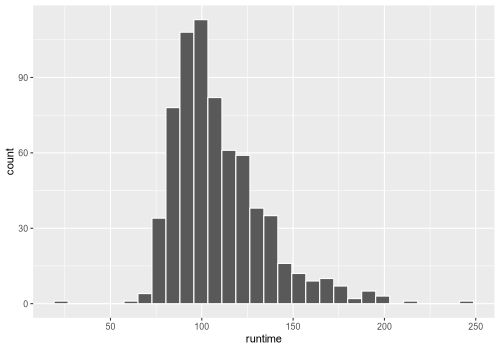

In [17]:
%%R -w 500 -h 350
ggplot(movies) +
    aes(x = runtime) +
    geom_histogram(color = 'white')

In ggplot,
there is a specific `geom` for densities
which does both the KDE calculation and plots a line.

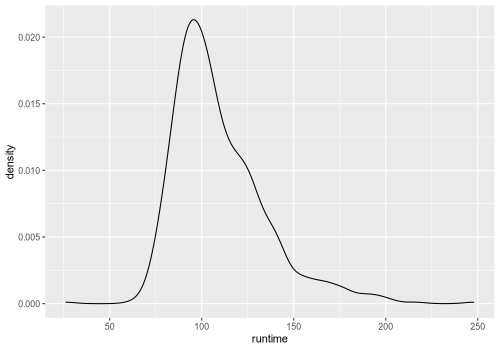

In [18]:
%%R -w 500 -h 350
ggplot(movies) +
    aes(x = runtime) +
    geom_density()

We can still control the parameters of the KDE calculation like in Altair,
for example the bandwidth,
how wide each kernel is
(similar to histogram bin width).

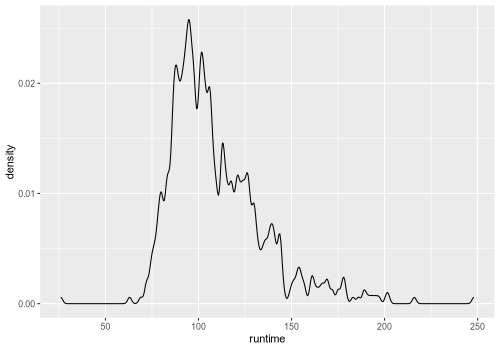

In [19]:
%%R -w 500 -h 350
ggplot(movies) +
    aes(x = runtime) +
    geom_density(bw=1)

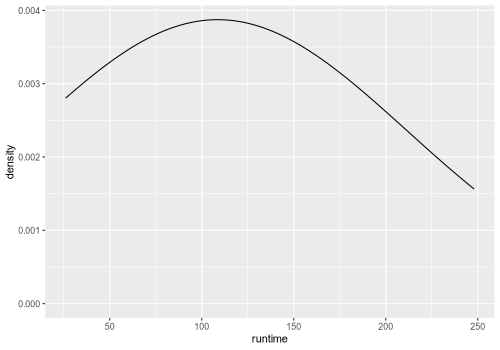

In [20]:
%%R -w 500 -h 350
ggplot(movies) +
    aes(x = runtime) +
    geom_density(bw=100)

Filling the density can make it look a bit nicer.

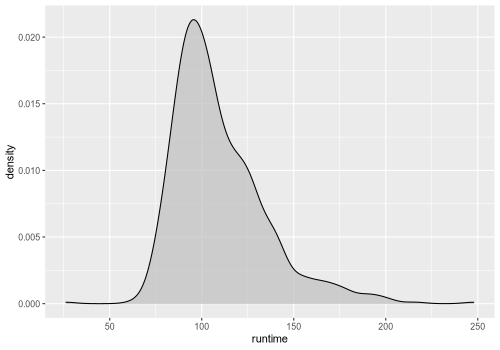

In [21]:
%%R -w 500 -h 350
ggplot(movies) +
    aes(x = runtime) +
    geom_density(fill = 'grey', alpha = 0.7)

To color/fill by a variable,
we don't need a separate groupby,
but can treat `geom_density` like any other geom,
which is convenient.
In dplyr,
a list can be unpacked via the `unnest` function.

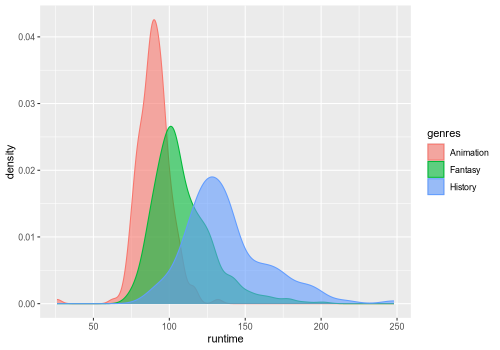

In [22]:
%%R -w 500 -h 350
free_genres <- movies %>% unnest(genres)
ggplot(free_genres) +
    aes(x = runtime,
        fill = genres,
        color = genres) +
    geom_density(alpha = 0.6)

We need to unpack both `genres` and `countries`
if we want to use aesthetic mappings for both these columns.

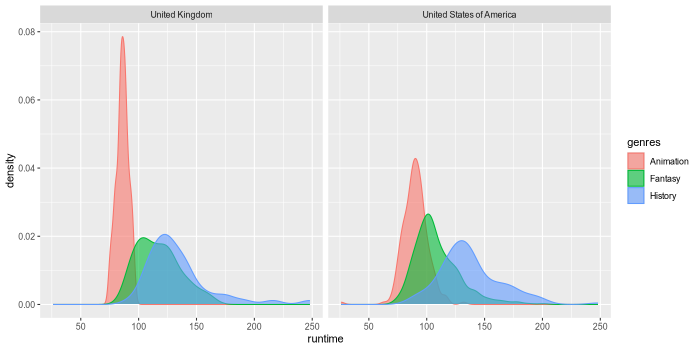

In [23]:
%%R -w 700 -h 350
free_both <- free_genres %>%
    unnest(countries)
ggplot(free_both) +
    aes(x = runtime,
        fill = genres,
        color = genres) +
    geom_density(alpha = 0.6) +
    facet_wrap(~countries)

To map the rows and columns of the plot grid to variables in the data set,
we can use `facet_grid` instead of `facet_wrap`.

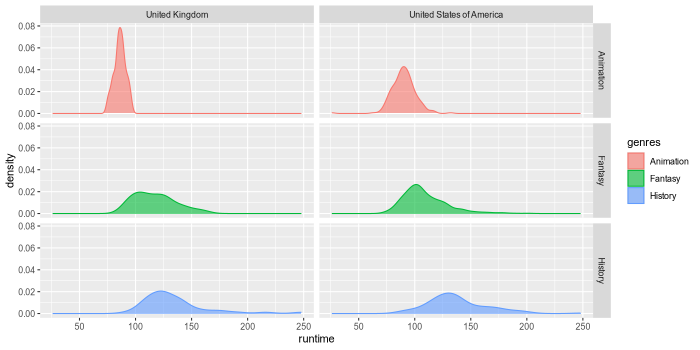

In [24]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        fill = genres,
        color = genres) +
    geom_density(alpha = 0.6) +
    facet_grid(genres ~ countries)

## Comparing distributions for multiple categorical variables along the y-axis

### Altair

While it is possible to make [violin plots](https://altair-viz.github.io/gallery/violin_plot.html)
in Altair,
these do currently not work with a categorical x/y axies,
and you need to use faceting instead to display different categories,
which gives us less flexibility.
Therefore,
we will primarily use boxplots when comparing multiple distributions with Altair.
Another option in altair
would be to use [stripplots](https://altair-viz.github.io/gallery/strip_plot_jitter.html) (categorical scatter plots),
via the offset encodings.

Below,
I am being explicit and keeping the same coloring as above,
although with boxplots we don't need a separate color
since the boxes have separate labels on the y-axis.

In [25]:
alt.Chart(boom_genres).mark_boxplot().encode(
     x='runtime',
     y='genres',
     color='genres'
)

alt.Chart(...)

Boxplots work well with faceting.

In [26]:
alt.Chart(boom_both).mark_boxplot().encode(
     x='runtime',
     y='genres',
     color='genres'
).facet(
    'countries',
    columns=1
)

alt.FacetChart(...)

The size of the boxes can be made proportional to the count of observations
in that group.
We could also have used barplot for this,
if we needed a more precise indication of the counts.

In [27]:
alt.Chart(boom_both).mark_boxplot().encode(
     x='runtime',
     y='genres',
     color='genres',
     size='count()'
).facet(
    'countries',
    columns=1
)

alt.FacetChart(...)

In general boxplots show 5-9 values
but this has shortcomings
as they hide important information,
such as multimodality and the number of observations.
I have included a couple of examples
showing how different plot types change
when the data changes.
This is from [Autodesk Research](https://www.autodesk.com/research/publications/same-stats-different-graphs)
who also made the animation of the datasaurus we saw in lecture 1.

![](img/hist-point-box.gif)

![](img/point-box-violin.gif)

Violinplots are yet not possible in an easy way in Altair,
but since I personally like seeing distributions,
I invented these 8-bit looking violins made out of square marks.

In [28]:
squareolins = alt.Chart(boom_both).mark_square().encode(
     x='runtime',
     y='genres',
     color='genres',
     size='count()'
)
squareolins.facet('countries', columns=1)

alt.FacetChart(...)

We could add a mean dot.
Below I recreate the chart
since there is no good way to remove the size and color encodings
that we had in the chart above
(and we don't want to color or resize the means).
I could have done these plots in the opposite order 
and avoided having to code the entire chart twice,
just changing the mark and the necessary encoding.

In [29]:
means = alt.Chart(boom_both).mark_circle(color='white').encode(
        x='mean(runtime)',
        y='genres'
)
(squareolins + means).facet('countries', columns=1)

alt.FacetChart(...)

This is one thing I appreciate with Altair 
(and graphical grammars in general):
understanding how to compose plots from individual elements,
allows you some creativity in what you make
versus using a pre-made plot via a set name (stripplot, violinplot, etc).
You should of course be very careful with this 
because the common plots exist for good reason,
they are statistically robust in many cases,
and common enough that they are easier for people to interpret
than your own creations in many cases.

## In ggplot

ggplot has a boxplot geom.

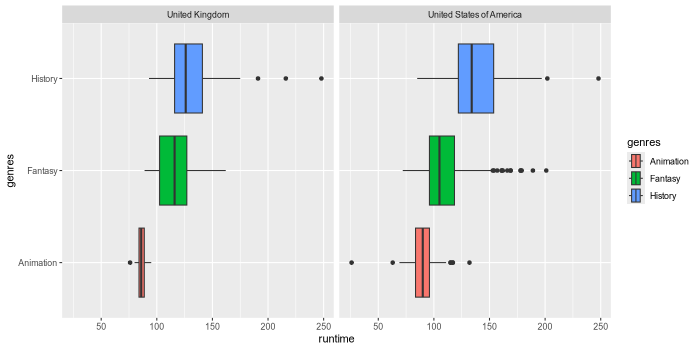

In [30]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = genres) +
    geom_boxplot() +
    facet_wrap(~countries)

Which we can scale by the count of observations.

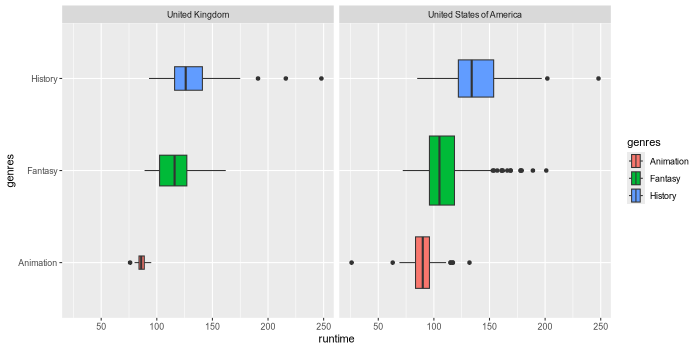

In [31]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = genres) +
    geom_boxplot(varwidth = TRUE) +
    facet_wrap(~countries)

There is also a geom for creating violin plots
which both calculates the density and then plots
a line and an area.

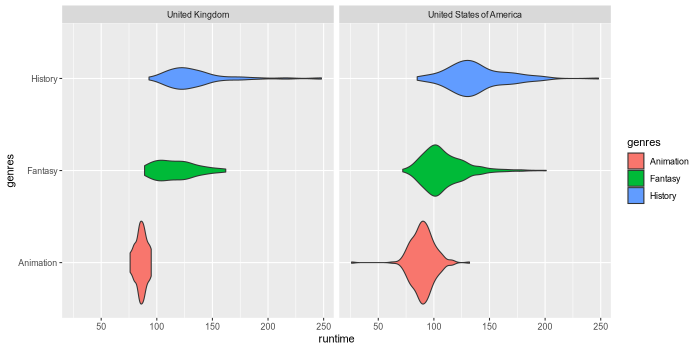

In [32]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = genres) +
    geom_violin() +
    facet_wrap(~countries)

These can also be scaled by size.

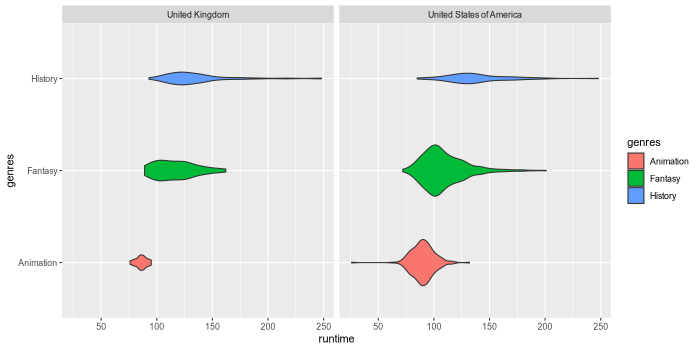

In [33]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = genres) +
    geom_violin(scale = 'count') +
    facet_wrap(~countries)

We can combine geoms to add e.g. the median to the plot.

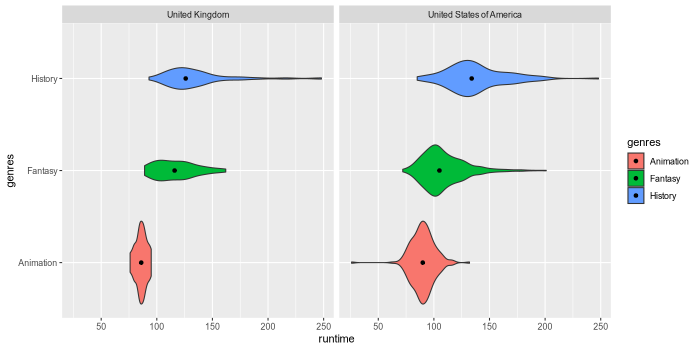

In [34]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = genres) +
    geom_violin() +
    geom_point(stat = 'summary', fun = median) +
    facet_wrap(~countries)

As we discussed in the previous lecture,
it is always a good idea to have a look at 
where the individual data points are.
For this we can use a categorical scatter plot
where the dots are spread/jittered randomly on the non-value axis
so that they don't all overlap via `geom_jitter`.

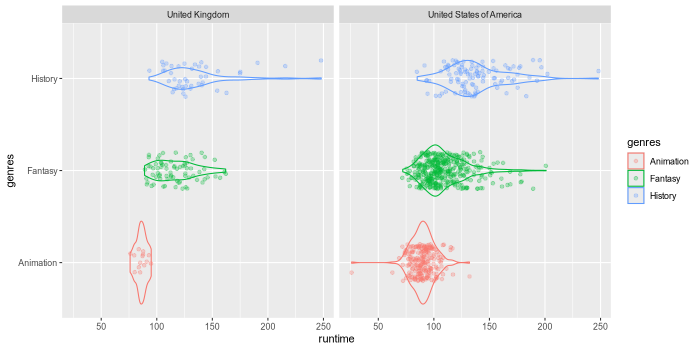

In [35]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        color = genres) +
    geom_jitter(height = 0.2, alpha = 0.3) +
    geom_violin(fill = NA) +
    facet_wrap(~countries)

ggplot understand that if you color by a variable,
it should create separate violins for each group on the same location
of the categorical axis.
In Altair,
this would be a bit more cumbersome since we would need to use different facets.

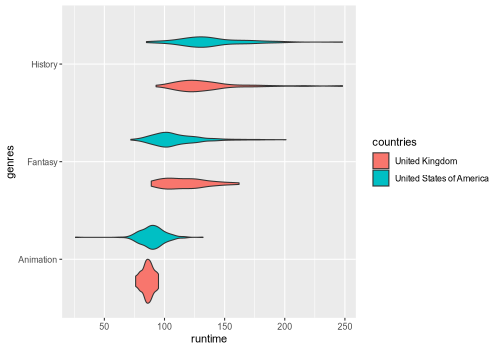

In [36]:
%%R -w 500 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = countries) +
    geom_violin()

When adding median points,
we will see that they don't line up as expected by default.
While the violins are "dodging" each other,
the points are aligned in a row.

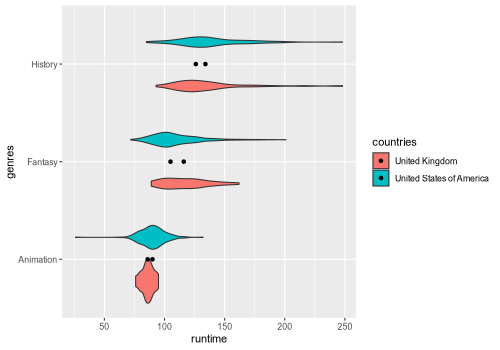

In [37]:
%%R -w 500 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = countries) +
    geom_violin() +
    geom_point(stat = 'summary', fun = median)

To add point in the right position for the median,
we need to use `position` parameter
to add the same dodge offset as for the violins.

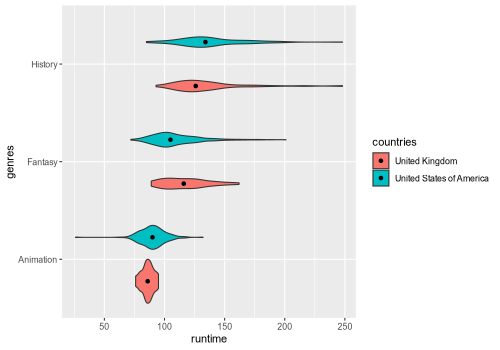

In [38]:
%%R -w 500 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = countries) +
    geom_violin() +
    geom_point(stat = 'summary', fun = median, position = position_dodge(0.9))
# 0.9 is the default offset for violins

You could also [use density lines in so called ridgeline plots to compare many distributions](https://www.r-graph-gallery.com/294-basic-ridgeline-plot.html).

## Optional material

This [short article on kernel bandwidth selection in density estimation](https://aakinshin.net/posts/kde-bw/) is insightful and goes beyond what we discuss in 531.

### Histogram line plots

This is a little bit of an aside,
and not something that will be on any test,
but since it has been a common question in the past
I am including it here for reference.

Instead we could draw a line for the histograms,
since this will not stack on top of each other,
but start from the same point of the y-axis.

In [39]:
alt.Chart(boom_both).mark_line().encode(
    alt.X('runtime').bin(maxbins=30),
    y='count()',
    color='genres'
).facet(
    'countries'
)

alt.FacetChart(...)

To make the lines appearance more histogram-like,
we could change the interpolation method.
This refers to how the line behaves between two data points
and the default is to draw a diagonal line between data points
(euclidean distance/linear interpolation).
If we instead use step-wise interpolation ([taxicab geometry/manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry)),
it looks more like a histogram.
But please note that I am only showing this for demonstration purposes,
this does not quite behave as a histogram and should not be used as such
as per [this GitHub comment from the Altair author](https://github.com/altair-viz/altair/issues/1701#issuecomment-534398358) (until this issue is fixed).

In [40]:
alt.Chart(boom_both).mark_line(interpolate='step').encode(
    alt.X('runtime').bin(maxbins=30),
    y='count()',
    color='genres'
).facet(
    'countries'
)

alt.FacetChart(...)

We could also prefer a [monotone cubic interpolation](https://en.wikipedia.org/wiki/Monotone_cubic_interpolation),
which essentially entails rounding the corners
while preserving the one-directional (monotone) properties of a linear interpolation
(i.e. make sure the line does not wiggle up and down between data points,
but proceed gradually from one to the next).

In [41]:
alt.Chart(boom_both).mark_line(interpolate='monotone').encode(
    alt.X('runtime').bin(maxbins=30),
    y='count()',
    color='genres'
).facet(
    'countries'
)

alt.FacetChart(...)

While this looks similar to a kernel density estimate (KDE),
it is not the same thing and should not be used as such
(but it could be useful for changing the appearance of line plots when a linear interpolation looks jagged and too noisy although we often want to perform some aggregation instead in those cases).

### Plots from slides

This is how I created the distribution plots in the slides.

In [42]:
from scipy.stats import pareto


dists = pd.concat([
    pd.DataFrame(
        dict(
            A = pareto.rvs(3, size=100, random_state=100).tolist() + [1.05]*25 + [1.1]*35 + [1.9]*15 + [1.8]*25,
            B = (pareto.rvs(3, size=160, random_state=100) * -1 + 2.85).tolist() + [1.75]*40,
            C = pareto.rvs(3, size=200, random_state=100) * -1 + 2.85,
            D = pareto.rvs(3, size=200, random_state=100),
            E = pareto.rvs(3, size=160, random_state=100).tolist() + [1.05] * 40,
        )
    ),
]).query(
    'A < 2 & B > 1 & C > 1 & D < 2 & E < 2'
).melt(
    var_name='dist_type'
)

# Looping due to a bug in concatenation of faceted charts
# This also gives separate images for saving
for dist_name, dist_df in dists.groupby('dist_type'):
    (alt.Chart(dist_df, height=150, title=dist_name).mark_bar().encode(
        x=alt.X('value', bin=alt.Bin(maxbins=30, extent=(1,1.9)), title='', scale=alt.Scale(domain=(1, 2))),
        y='count()',
    ) &  alt.Chart(dist_df, height=40).mark_boxplot(size=30).encode(
        x=alt.X('value', scale=alt.Scale(zero=False, domain=(1, 1.9)), title=''),
        y=alt.Y('dist_type', title='', axis=alt.Axis(labels=False)),
    )).display()

alt.VConcatChart(...)

alt.VConcatChart(...)

alt.VConcatChart(...)

alt.VConcatChart(...)

alt.VConcatChart(...)